In [ ]:
import pandas as pd

# Explicit list of your files
files = [
    "/content/E0.csv",
    "/content/E0 (1).csv",
    "/content/E0 (2).csv",
    "/content/E0 (3).csv",
    "/content/E0 (4).csv",
    "/content/E0 (5).csv",
    "/content/E0 (6).csv",
    "/content/E0 (7).csv",
    "/content/E0 (8).csv",
    "/content/E0 (9).csv"
]

dataframes = []

for i, file in enumerate(files):
    df = pd.read_csv(file)
    df["Season"] = f"Season_{i+1}"  # add season tag
    dataframes.append(df)

merged = pd.concat(dataframes, ignore_index=True)

# Save merged file
merged.to_csv("/content/premier_league_merged.csv", index=False)

print("✅ Merged dataset created. Total matches:", len(merged))


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/premier_league_merged.csv")

# See first 5 rows
print(df.head())

# Check column names
print("\nColumns:\n", df.columns)

# Check missing values
print("\nMissing values:\n", df.isnull().sum())


  Div        Date   Time     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  15/08/2025  20:00    Liverpool  Bournemouth     4     2   H     1   
1  E0  16/08/2025  12:30  Aston Villa    Newcastle     0     0   D     0   
2  E0  16/08/2025  15:00     Brighton       Fulham     1     1   D     0   
3  E0  16/08/2025  15:00   Sunderland     West Ham     3     0   H     0   
4  E0  16/08/2025  15:00    Tottenham      Burnley     3     0   H     1   

   HTAG  ... BbMx>2.5 BbAv>2.5  BbMx<2.5  BbAv<2.5  BbAH  BbAHh  BbMxAHH  \
0     0  ...      NaN      NaN       NaN       NaN   NaN    NaN      NaN   
1     0  ...      NaN      NaN       NaN       NaN   NaN    NaN      NaN   
2     0  ...      NaN      NaN       NaN       NaN   NaN    NaN      NaN   
3     0  ...      NaN      NaN       NaN       NaN   NaN    NaN      NaN   
4     0  ...      NaN      NaN       NaN       NaN   NaN    NaN      NaN   

   BbAvAHH  BbMxAHA  BbAvAHA  
0      NaN      NaN      NaN  
1      NaN      NaN     

In [3]:
df.dropna()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA



Missing values:
 Div            0
Date           0
Time        1140
HomeTeam       0
AwayTeam       0
            ... 
BbAHh       2290
BbMxAHH     2290
BbAvAHH     2290
BbMxAHA     2290
BbAvAHA     2290
Length: 181, dtype: int64


In [5]:
df = df.dropna(axis=1)


In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
PSH         0
PSD         0
PSA         0
PSCH        0
PSCD        0
PSCA        0
Season      0
dtype: int64


In [8]:
def match_result(row):
    if row["FTHG"] > row["FTAG"]:
        return "H"
    elif row["FTHG"] < row["FTAG"]:
        return "A"
    else:
        return "D"

df["result"] = df.apply(match_result, axis=1)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
team_encoder = LabelEncoder()

# Fit on all teams (both home and away)
all_teams = pd.concat([df["HomeTeam"], df["AwayTeam"]])
team_encoder.fit(all_teams)

# Transform
df["HomeTeam_enc"] = team_encoder.transform(df["HomeTeam"])
df["AwayTeam_enc"] = team_encoder.transform(df["AwayTeam"])

# Features and target
X = df[["HomeTeam_enc", "AwayTeam_enc"]]
y = df["FTR"]   # Full Time Result (H/D/A)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4679300291545189
              precision    recall  f1-score   support

           A       0.49      0.47      0.48       232
           D       0.26      0.20      0.23       157
           H       0.53      0.61      0.56       297

    accuracy                           0.47       686
   macro avg       0.43      0.43      0.42       686
weighted avg       0.45      0.47      0.46       686



In [15]:
import pickle

with open("baseline_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("team_encoder.pkl", "wb") as f:
    pickle.dump(team_encoder, f)


In [16]:
# Encode target (Full Time Result)
result_encoder = LabelEncoder()
y = result_encoder.fit_transform(df["FTR"])

# Save it
with open("result_encoder.pkl", "wb") as f:
    pickle.dump(result_encoder, f)


In [31]:
import pickle
import pandas as pd

# Load trained model and encoder
model = pickle.load(open("baseline_model.pkl", "rb"))
team_encoder = pickle.load(open("team_encoder.pkl", "rb"))

# Today's match
home_team = "Newcastle"
away_team = "Liverpool"

# Encode teams
home_enc = team_encoder.transform([home_team])[0]
away_enc = team_encoder.transform([away_team])[0]

# Use the exact column names from training
match_features = pd.DataFrame([[home_enc, away_enc]], columns=["HomeTeam_enc", "AwayTeam_enc"])

# Predict
pred = model.predict(match_features)[0]

# Map prediction to label
inverse_map = {0: "H", 1: "D", 2: "A"}
label = inverse_map.get(pred, pred)

mapping = {"H": f"{home_team} Win", "D": "Draw", "A": f"{away_team} Win"}
prediction_text = mapping.get(label, label)

# Prediction probabilities
probas = model.predict_proba(match_features)[0]
proba_map = dict(zip(model.classes_, probas))
proba_readable = {mapping.get(inverse_map.get(k, k), k): round(v*100, 1) for k, v in proba_map.items()}

print(f"{home_team} vs {away_team} Prediction: **{prediction_text}**")
print("Probabilities:", proba_readable)


Newcastle vs Liverpool Prediction: **Liverpool Win**
Probabilities: {'Liverpool Win': np.float64(86.2), 'Draw': np.float64(13.8), 'Newcastle Win': np.float64(0.0)}


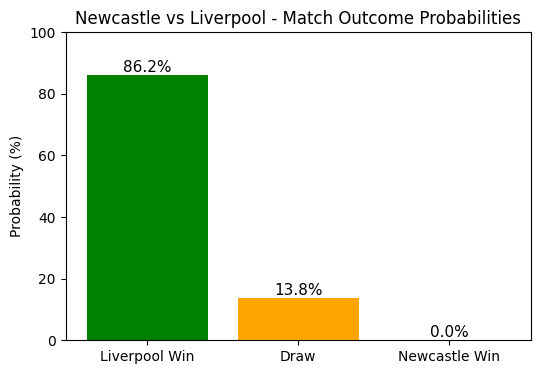

In [32]:
import matplotlib.pyplot as plt

# Data for plotting
labels = list(proba_readable.keys())
probabilities = list(proba_readable.values())

plt.figure(figsize=(6,4))
bars = plt.bar(labels, probabilities, color=['green', 'orange', 'red'])
plt.title(f"{home_team} vs {away_team} - Match Outcome Probabilities")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)

# Annotate percentages on bars
for bar, prob in zip(bars, probabilities):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{prob}%", ha='center', fontsize=11)

plt.show()


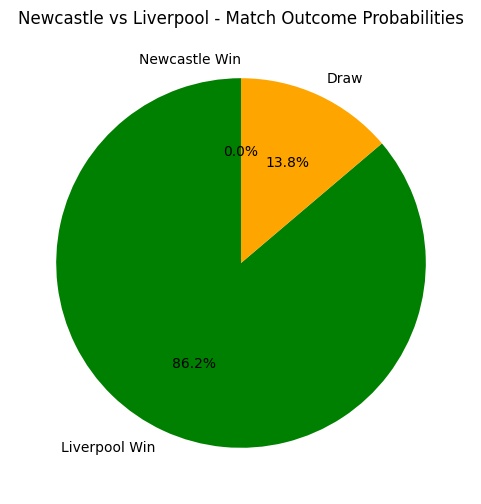

In [33]:
plt.figure(figsize=(6,6))
plt.pie(probabilities, labels=labels, autopct='%1.1f%%', colors=['green', 'orange', 'red'], startangle=90)
plt.title(f"{home_team} vs {away_team} - Match Outcome Probabilities")
plt.show()


/tmp/ipython-input-2524650991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=probabilities, palette=['green' if l=='Home Win' else 'orange' if l=='Draw' else 'red' for l in labels])


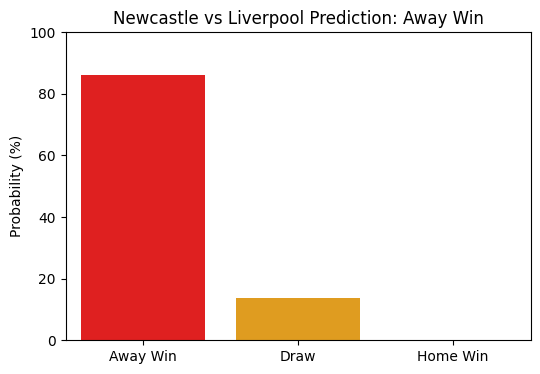

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=probabilities, palette=['green' if l=='Home Win' else 'orange' if l=='Draw' else 'red' for l in labels])
plt.title(f"{home_team} vs {away_team} Prediction: {prediction_text}")
plt.ylabel("Probability (%)")
plt.ylim(0, 100)
plt.show()
